In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.rcParams["font.family"] = "DejaVu Sans"

For training file

/tmp/ipykernel_33573/807293182.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('turbo')


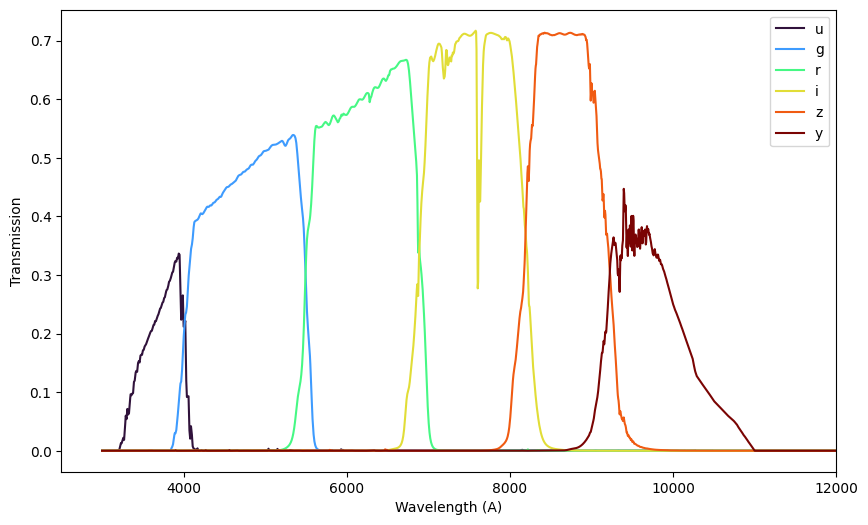

In [2]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
filter_folder = '/home/hallouin/Documents/thall_2025/photoz/lephare/training_stats/simulation_catalogs/buzzard_base/FILTERS'
print()
plt.figure(figsize=(10, 6))

filters = ['BuzzardLSSTu.res', 'BuzzardLSSTg.res', 'BuzzardLSSTr.res', 'BuzzardLSSTi.res', 'BuzzardLSSTz.res', 'BuzzardLSSTy4.res',]

cmap = cm.get_cmap('turbo')
colors = [cmap(i / (len(filters) - 1)) for i in range(len(filters))]

for i, filt in enumerate(filters):
    if not filt.endswith(".res"):  # Adjust if your filter files use a different extension
        continue
    filtre = os.path.join(filter_folder, f'{filt}')
    df = np.loadtxt(filtre)
    plt.plot(df.T[0], df.T[1], label=f'{filt}'[11], color=colors[i])

# plt.title("Filters transmission as a function of wavelength")
plt.xlabel("Wavelength (A)")
plt.ylabel("Transmission")
plt.xlim(2500,12000)
plt.legend()
plt.show()

for DES

/tmp/ipykernel_33573/1621831100.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('turbo')


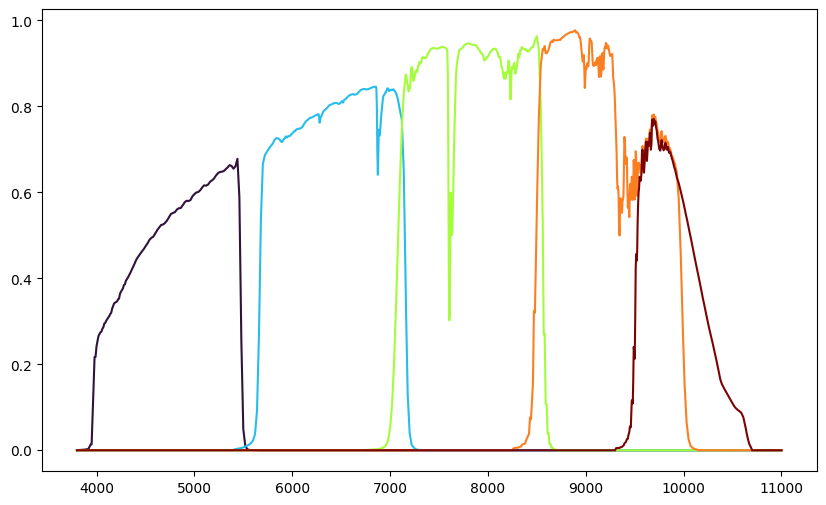

In [3]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
#all filts in the same folder
filters_DES_path = '/home/hallouin/Documents/thall_2025/photoz/lephare/training_stats/simulation_catalogs/DES/DES/DES_STARCAT/scidoc0434.txt'

scidoc0434 = np.loadtxt(filters_DES_path).T
trans_DES = scidoc0434[1:-1]

plt.figure(figsize=(10, 6))
cmap = cm.get_cmap('turbo')
colors = [cmap(i / (len(trans_DES) - 1)) for i in range(len(trans_DES))]


for i, filt in enumerate(trans_DES):
    plt.plot(scidoc0434[0], filt, label=f'{filt}'[11], color=colors[i])

# # plt.title("Filters transmission as a function of wavelength")
# plt.xlabel("Wavelength (A)")
# plt.ylabel("Transmission")
# plt.xlim(2500,12000)
# plt.legend()
# plt.show()

In [23]:
filters_DES_path = '/home/hallouin/Documents/thall_2025/photoz/lephare/training_stats/simulation_catalogs/DES/DES/DES_STARCAT/scidoc0434.txt'
output_DES_filter_path = '/home/hallouin/Documents/thall_2025/photoz/lephare/training_stats/simulation_catalogs/DES/DES/DES_STARCAT/WORK_COMPLETE2/filt/'
DES_filter_list = ['g', 'r', 'i','z','Y']

def split_filterfile(input_file_path, ouput_folder_path, output_prefix, filter_list):
    df = np.loadtxt(input_file_path).T
    filters = df[1:-1]
    wavelength = df[0]

    for i, filt in enumerate(filters):
        output_file_name = f"{output_prefix}_{DES_filter_list[i]}.res"
        output_file_path = os.path.join(ouput_folder_path, output_file_name)
        output_data = np.vstack((wavelength, filters[i])).T
        np.savetxt(output_file_path, output_data, delimiter=' ')

split_filterfile(filters_DES_path, output_DES_filter_path, "DES_filter", DES_filter_list)
